In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
bmi_data = pd.read_csv('bmi.csv')

In [3]:
bmi_data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
bmi_data.shape

(500, 4)

In [16]:
bmi_data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [17]:
bmi_data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [18]:
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


<Axes: xlabel='Gender', ylabel='Height'>

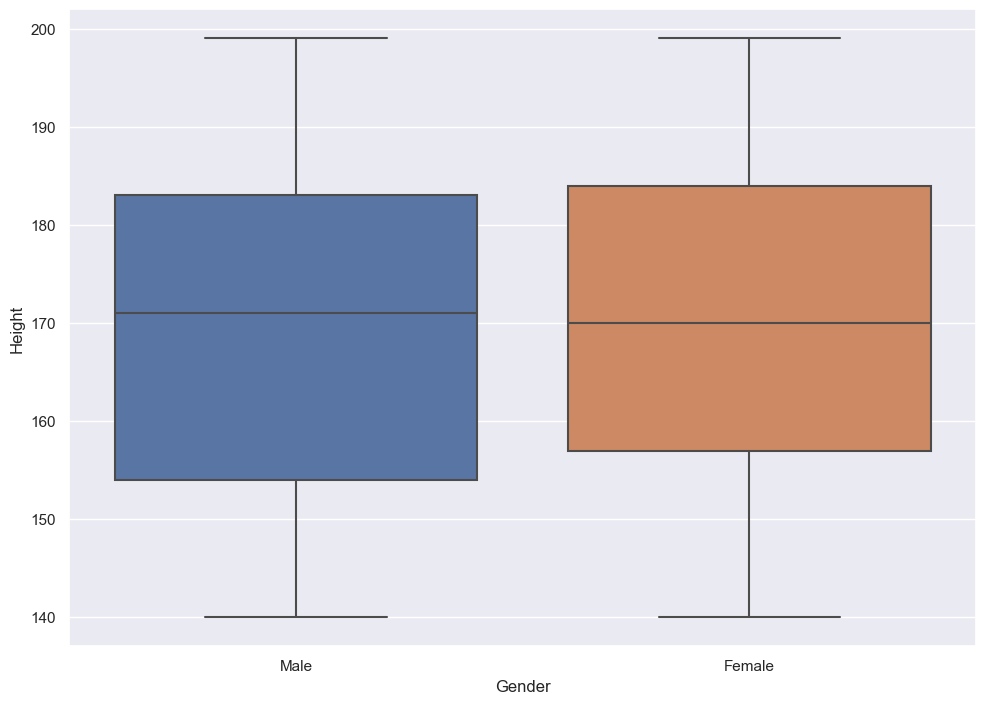

In [19]:
sns.boxplot(bmi_data, x="Gender" , y="Height")

<Axes: xlabel='Gender', ylabel='Weight'>

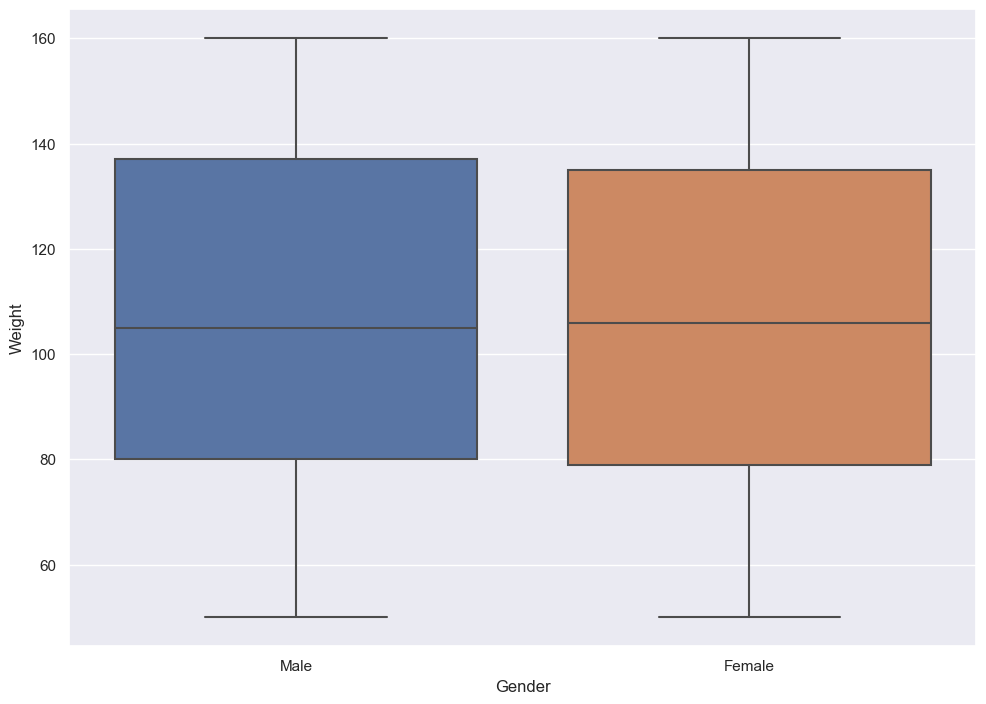

In [20]:
sns.boxplot(bmi_data, x="Gender" , y="Weight")

<Axes: >

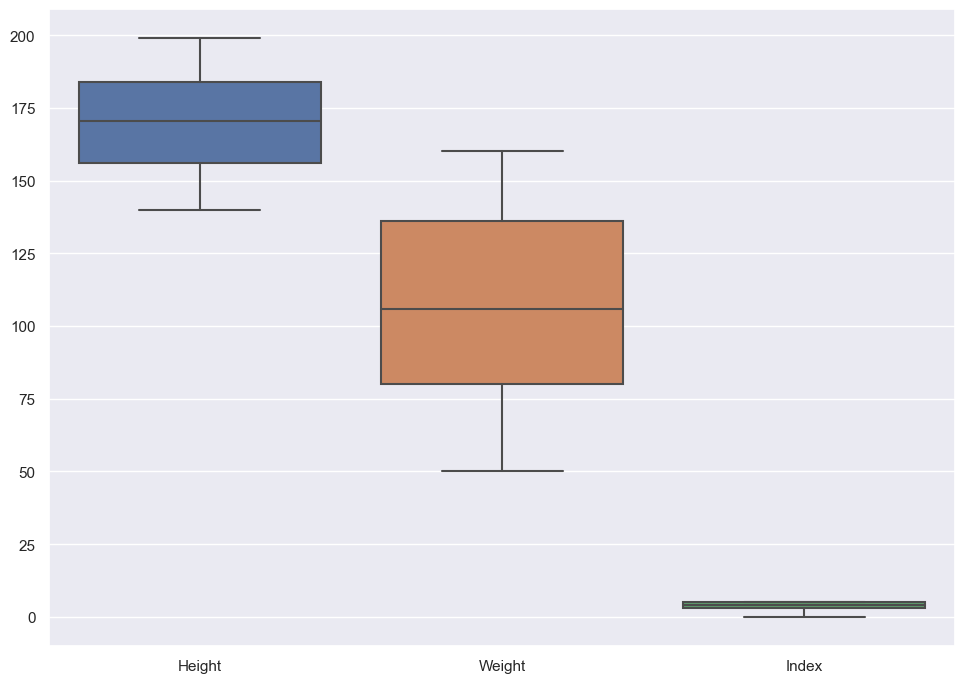

In [22]:
sns.boxplot(bmi_data)

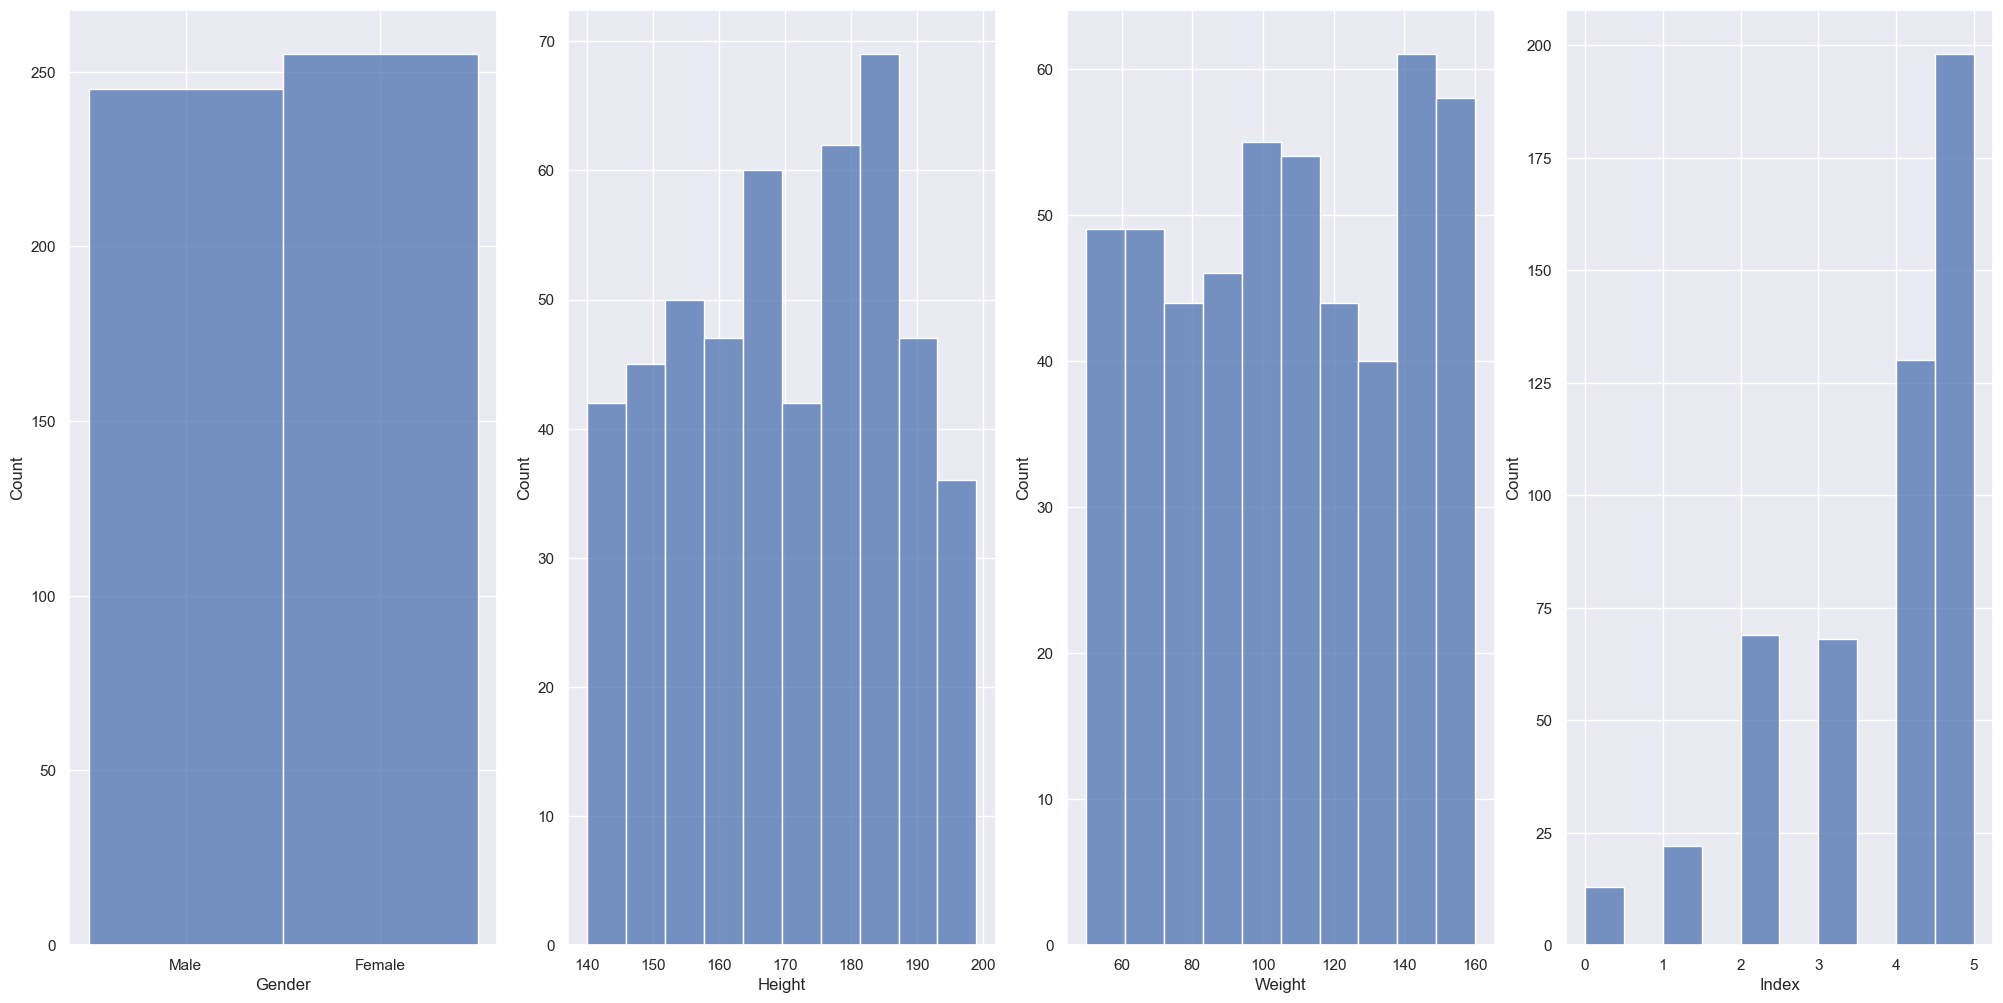

In [24]:
fig, ax = plt.subplots(ncols=4,nrows=1,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in bmi_data.items():
    sns.histplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)
                     

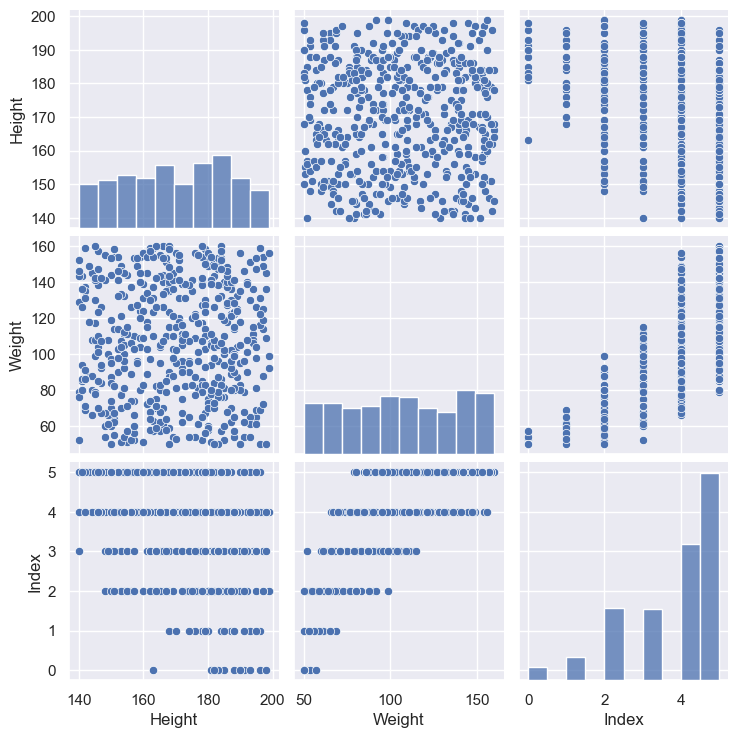

In [25]:
sns.pairplot(bmi_data)

<Axes: >

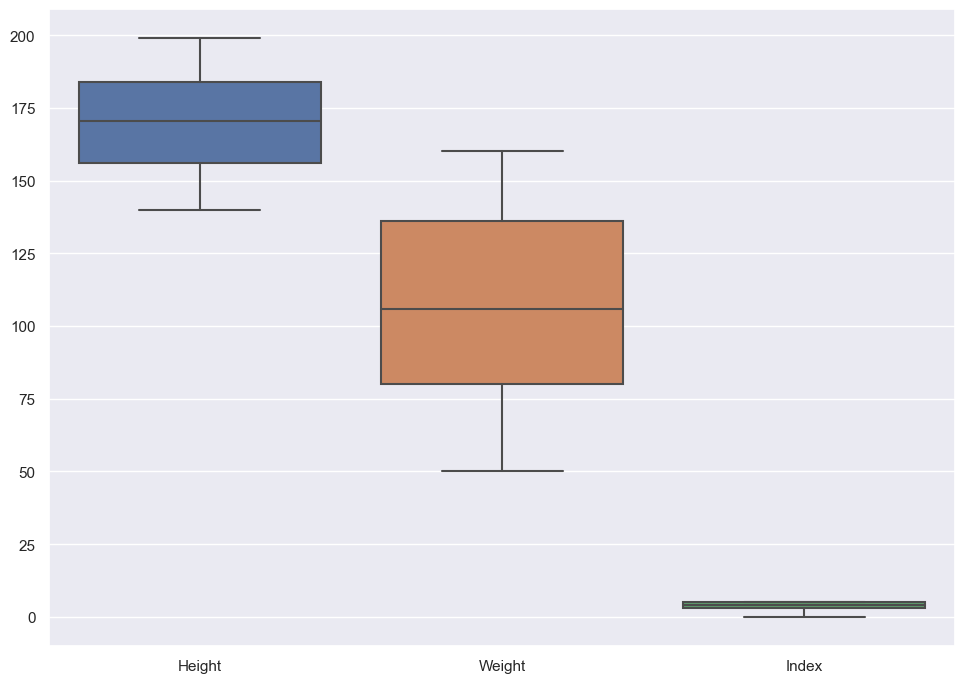

In [13]:
sns.boxplot(bmi_data)

<Axes: ylabel='Count'>

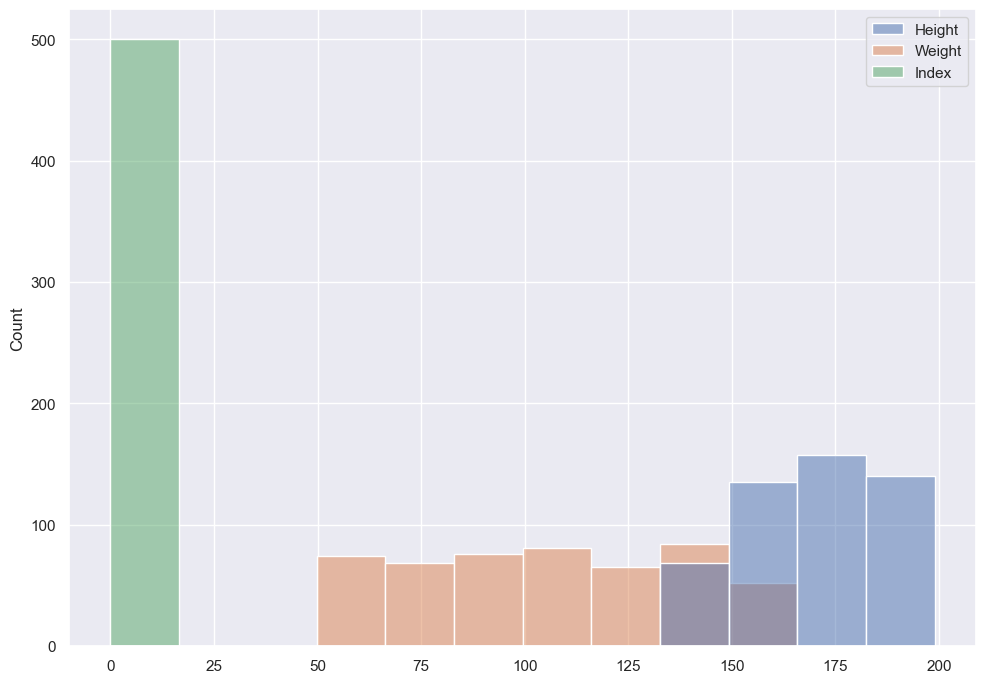

In [14]:
sns.histplot(bmi_data)

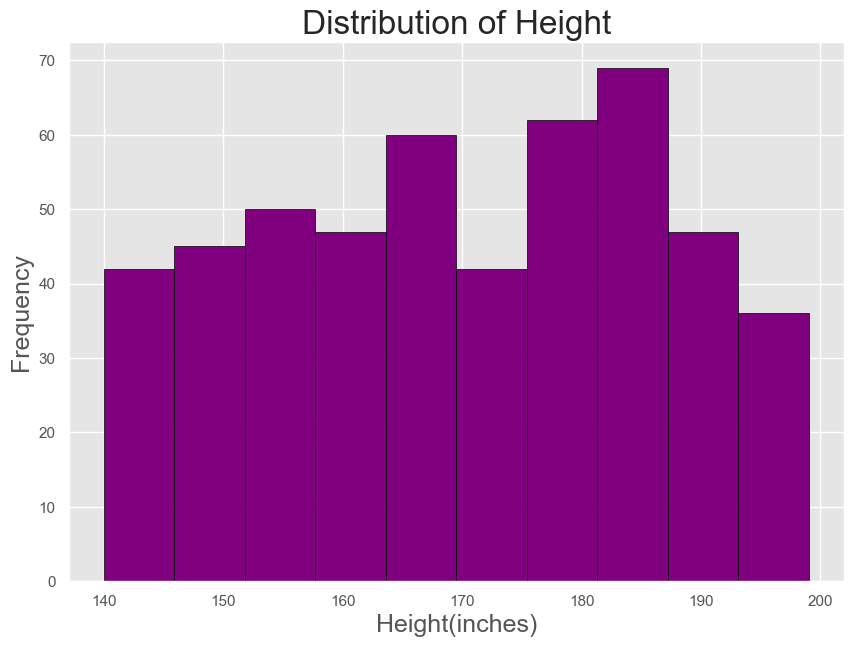

In [29]:
#Histgram of Height
plt.style.use("ggplot")
bmi_data.Height.plot(kind="hist",color="purple",edgecolor="black",figsize=(10,7))
plt.title("Distribution of Height",size=24)
plt.xlabel("Height(inches)",size=18)
plt.ylabel("Frequency",size=18);

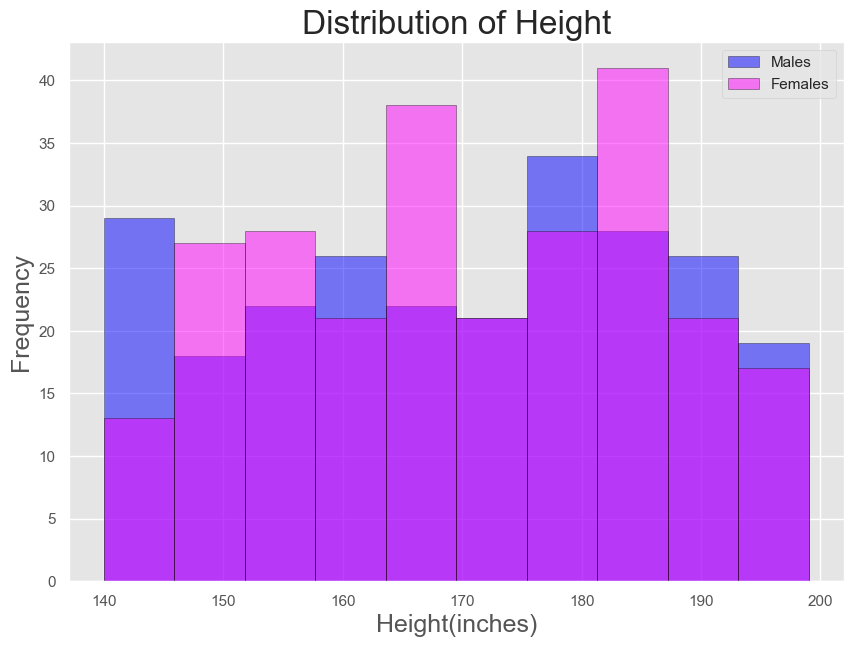

In [31]:
#Histgram of Height - males and females

bmi_data[bmi_data["Gender"]=='Male'].Height.plot(kind="hist",color="blue",edgecolor="black",alpha=0.5,figsize=(10,7))
bmi_data[bmi_data["Gender"]=='Female'].Height.plot(kind="hist",color="magenta",edgecolor="black",alpha=0.5,figsize=(10,7))
plt.legend(labels=["Males","Females"])
plt.title("Distribution of Height",size=24)
plt.xlabel("Height(inches)",size=18)
plt.ylabel("Frequency",size=18);

Text(0, 0.5, 'Weight (pounds)')

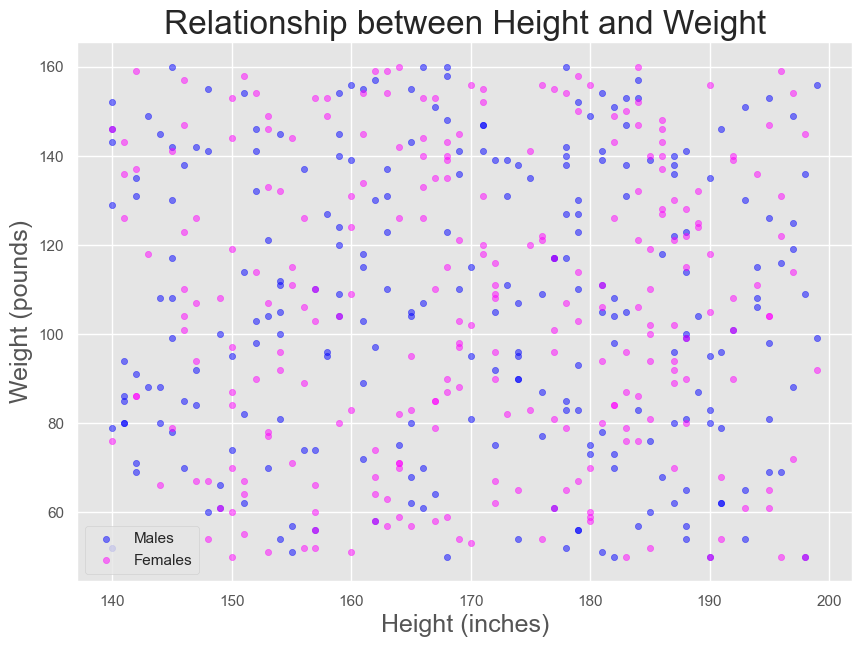

In [35]:
ax1 = bmi_data[bmi_data['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', 
alpha=0.5, figsize=(10, 7))
bmi_data[bmi_data['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', 
alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)

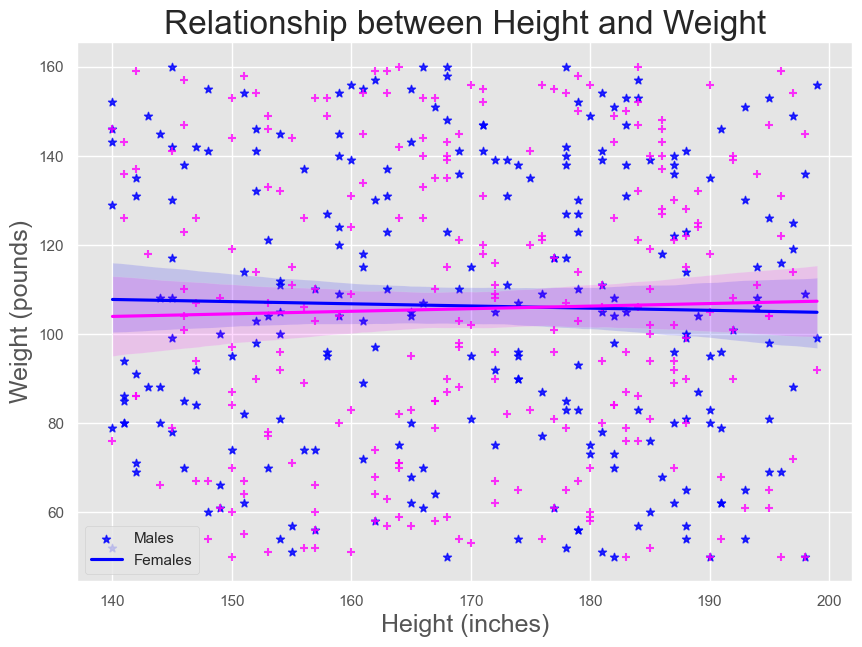

In [38]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='*')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

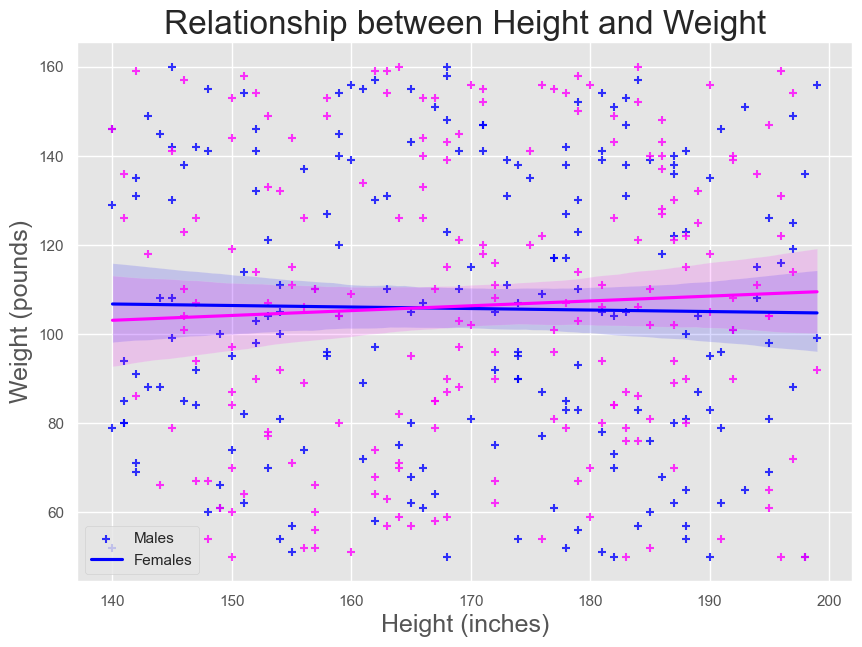

In [39]:
import seaborn as sns

# 300 random samples
df_males_sample = bmi_data[bmi_data['Gender'] == 'Male'].sample(200)
df_females_sample = bmi_data[bmi_data['Gender'] == 'Female'].sample(200)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='blue', marker='+')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='magenta',
marker='+')

# legend, title, and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

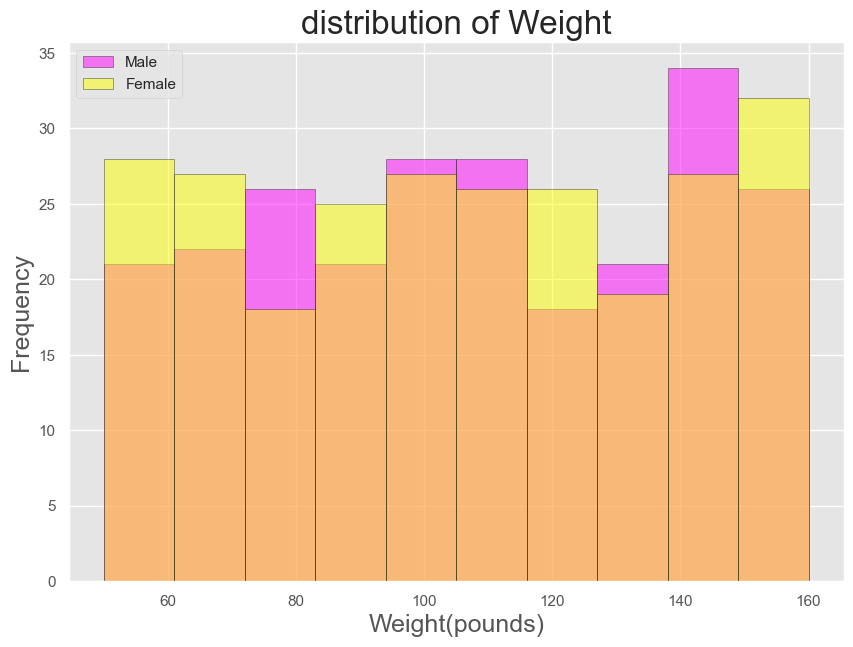

In [40]:
#histogram of the weight - males vs female
bmi_data[bmi_data['Gender']=='Male'].Weight.plot(kind='hist',color='magenta',edgecolor='black',alpha=0.5,figsize=(10,7))
bmi_data[bmi_data['Gender']=='Female'].Weight.plot(kind='hist',color='yellow',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Male','Female'])
plt.title('distribution of Weight',size=24)
plt.xlabel('Weight(pounds)',size=18)
plt.ylabel('Frequency',size=18);